<a href="https://colab.research.google.com/github/merkarii/StockAnalysisVisualization/blob/main/StockMarketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib yfinance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
stock_symbol = 'INFY'
start_date = '2010-01-01'
end_date = '2023-01-01'

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
print(stock_data.head())

In [ ]:
stock_data['50_day_MA'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['daily_returns'] = stock_data['Adj Close'].pct_change()

print(stock_data.head())

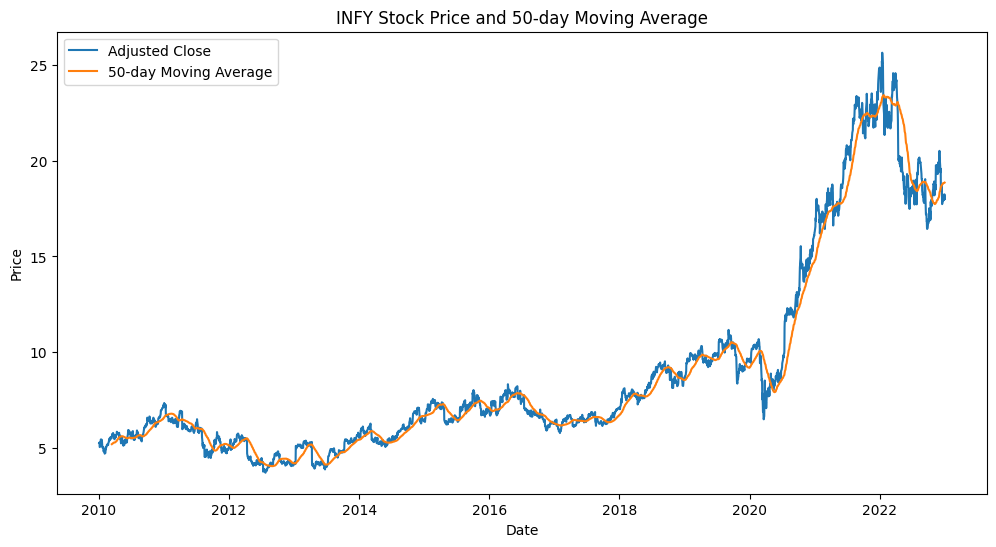

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adjusted Close')
plt.plot(stock_data.index, stock_data['50_day_MA'], label='50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_symbol} Stock Price and 50-day Moving Average')
plt.legend()
plt.show()

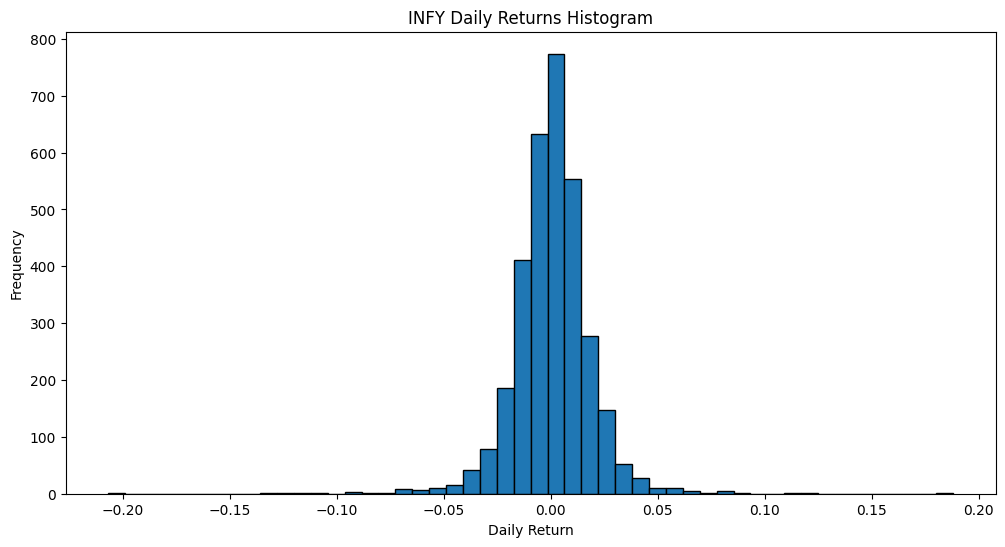

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(stock_data['daily_returns'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title(f'{stock_symbol} Daily Returns Histogram')
plt.show()

**Lets try MVA on weekly monthly yearly chart**

In [23]:
# Resample the stock data to weekly, monthly, and yearly frequency
weekly_data = stock_data['Adj Close'].resample('W').last()
monthly_data = stock_data['Adj Close'].resample('M').last()
yearly_data = stock_data['Adj Close'].resample('Y').last()

In [24]:
# Calculate the moving average for each resampled dataset
weekly_data_MA = weekly_data.rolling(window=4).mean()  # 4 weeks moving average
monthly_data_MA = monthly_data.rolling(window=12).mean()  # 12 months moving average
yearly_data_MA = yearly_data.rolling(window=1).mean()  # 1 years moving average

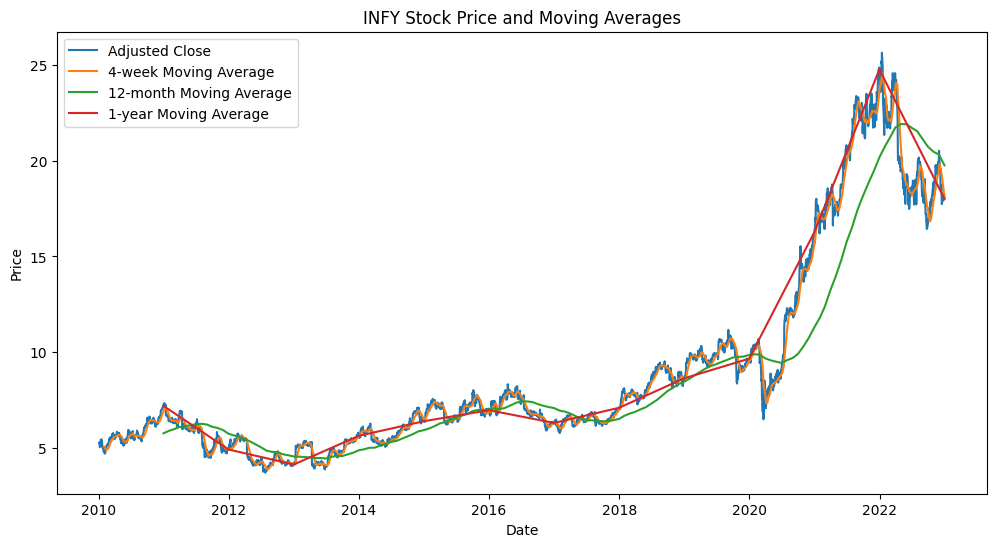

In [25]:
# Plot the original adjusted closing price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adjusted Close')
plt.plot(weekly_data_MA.index, weekly_data_MA, label='4-week Moving Average')
plt.plot(monthly_data_MA.index, monthly_data_MA, label='12-month Moving Average')
plt.plot(yearly_data_MA.index, yearly_data_MA, label='1-year Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.legend()
plt.show()